# Task 6

## Part 1

Get data from https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv 

Plot: 
- The temperature 
- the mean temmperature each day 
- the mean temperature for each month


In [15]:
# import packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Setting up the data with pandas 
Before analysing the data, a series of operations need to be completed to set up the data correctly.  

- **Importing the data**: The original data has ~20 rows where the column labels are exaplained, so those rows need to be skipped when importing the dataframe (see: https://stackoverflow.com/questions/20637439/skip-rows-during-csv-import-pandas). 

- **Dtypes**: Becuase of the first rows of metadata, it's not possible to infer the data types from the first rows of data. For this reason, the param low_memory is set to False. This means that the data will be fully read, before dtypes are assigned. See: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [16]:
# get data from url 
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'
weather = pd.read_csv(url, skiprows=22, low_memory=False)

# preview data
weather.head(10)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
5,31-jul-1996 12:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,0,1,82,0.0,40000,43,6
6,31-jul-1996 13:00,0,0.0,0,14.9,0,10.9,6.7,0.0,0,...,0,0,0,0,2,11,0.0,40000,43,5
7,31-jul-1996 14:00,0,0.0,0,13.9,0,10.4,6.7,0.0,0,...,0,0,0,0,2,11,0.0,50000,45,6
8,31-jul-1996 15:00,0,0.0,0,13.2,0,10.9,8.6,0.0,0,...,0,0,0,0,25,82,0.0,8000,45,7
9,31-jul-1996 16:00,0,0.0,0,15.1,0,11.3,7.5,0.0,0,...,0,0,0,0,25,82,0.0,35000,40,7


- **converting dates** and **setting date as index**: this is useful to use the resampling() and rolling() methods, to represent different intervals from the same data. 
See: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html. 

In [17]:
# change date format to datetime and set date as df index. See: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 
weather['date'] = pd.to_datetime(weather['date'], format="%d-%b-%Y %H:%M")
weather = weather.set_index('date') 
# preview data
weather.head(5)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6


- **removing irrelevat data**: There are incomplete data on year 1996 (one datapoint in April, then July-December). This incomplete data would distort the plot, so it's better removing it and having the data start from 1997/01/01. 

In [18]:
# Clean up data. Remove incomplete data on 1996 (one day in April, and then July-Dec)
new_start = '1997-01-01 00:00:00'
weather = weather.loc[new_start:]

weather.head(5)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1997-01-01 00:00:00,3,0.0,1,-2.9,1,-3.0,-3.6,4.8,98,1031.2,2,7,2,350,2,11,0.0,40000,999,1
1997-01-01 01:00:00,3,0.0,1,-2.9,5,-3.1,-3.9,4.6,93,1031.4,2,9,2,30,2,11,0.0,40000,999,1
1997-01-01 02:00:00,3,0.0,1,-3.1,5,-3.2,-3.8,4.6,95,1031.7,2,7,2,20,2,11,0.0,40000,999,1
1997-01-01 03:00:00,3,0.0,1,-3.2,5,-3.3,-3.9,4.6,95,1031.7,2,8,2,20,2,11,0.0,40000,999,1
1997-01-01 04:00:00,3,0.0,1,-3.5,5,-3.6,-4.3,4.5,94,1031.7,2,7,2,10,2,11,0.0,40000,999,1


### Temperatures (in 1997)

It looks like my codespace is not able to handle the temperatures from the full dataset, so I choosing to plot only the first year, 1997. I might come back later on this. 

A subset of the original dataframe is created and Seaborne used to plot the data. See df.loc[]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html, seaborn: https://seaborn.pydata.org/generated/seaborn.lineplot.html . 

In [20]:
# select only data from 1997, because the codespace is not able to handle the full dataset. 
start = "1997-01-01 00:00:00"
end = "1997-12-31 23:00:00"
weather_1997 = weather.loc[start:end]

Text(0.5, 1.0, 'Temperatures in 1997')

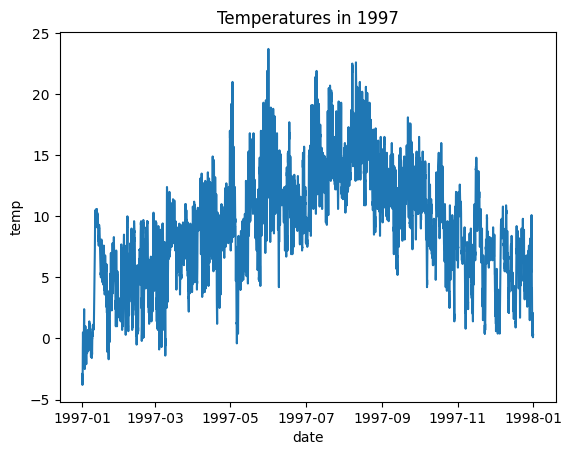

In [25]:
# plot temperature in 1997
fig, ax = plt.subplots()
sns.lineplot(data=weather_1997, x = 'date', y = 'temp')
plt.title('Temperatures in 1997')
#ax.set_xticks([])
#ax.set_xlabel("apr-dec 1997")

### Daily mean temperatures

The Pandas method resample() is used to resample the hourly data of the dataframe to create a new dataframe with monthly data points representing the average temperature. 

See: resample(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html, offset params: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases, round(): https://www.geeksforgeeks.org/python/pandas-dataframe-round/. 

In [26]:
# Resampling to get daily mean temperatures 
daily_t = weather['temp'].resample('D').mean().round(2)
daily_temp = pd.DataFrame(daily_t, index = daily_t.index)

# show 
# daily_temp.head(5)

Text(0.5, 1.0, 'Montly mean temperatures')

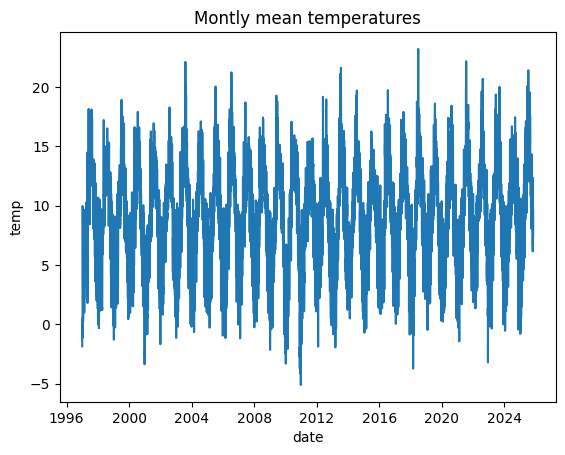

In [28]:
# plot mean daily temperature
sns.lineplot(data=daily_temp, x = 'date', y = 'temp')
plt.title('Montly mean temperatures')

In [10]:
# resample data to get mean temperature for each month (month start)
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html 
# Resampling time params: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases 
# round numbers for readability. See: https://www.geeksforgeeks.org/python/pandas-dataframe-round/

monthly_t = weather['temp'].resample('MS').mean().round(2)

monthly_temp = pd.DataFrame(monthly_t, index = monthly_t.index)

# show 
# monthly_temp.head(5)
# add length? 

<Axes: xlabel='date', ylabel='temp'>

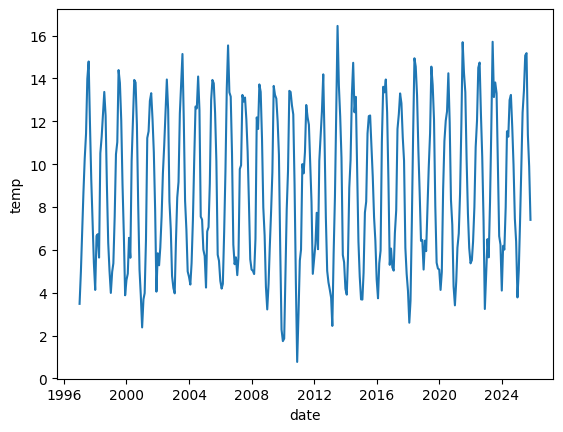

In [11]:
# plot the data 
sns.lineplot(data=monthly_temp, x = 'date', y = 'temp')

In [12]:
# add rolling???

## Part 2

Plot:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)

In [45]:
#create a subset without empty data and re-format data type to integers 
weather['wdsp'] = weather['wdsp'].fillna(value = ' ')
weather_wdsp = weather[weather.loc[:,'wdsp'] != ' ']
# using loc instead of deprecated method. However, this way it looks like the series is still an object, although the individual values seem to be integers
# weather_wdsp.loc[:,'wdsp'] = pd.to_numeric(weather_wdsp['wdsp'])
# deprecated version 
weather_wdsp['wdsp'] = pd.to_numeric(weather_wdsp['wdsp'])

# verify new data type --> why does it look like wdsp is still an object? 
#weather_wdsp.dtypes

/tmp/ipykernel_25687/1889089433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_wdsp['wdsp'] = pd.to_numeric(weather_wdsp['wdsp'])


<Axes: xlabel='date', ylabel='wdsp'>

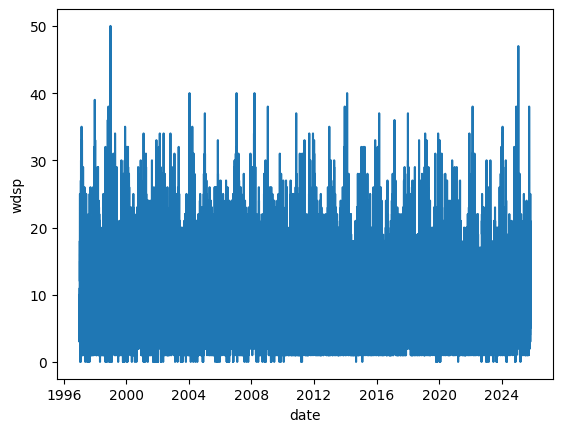

In [46]:
# Plot windspeed 
sns.lineplot(data = weather_wdsp, x = 'date', y = 'wdsp')

In [76]:
# create df to plot rolling windspeed over 24h
weather_rolling_wdsp = pd.DataFrame()
weather_rolling_wdsp['wdsp'] =  weather_wdsp['wdsp'].rolling('24h').mean()

# show new df
#weather_rolling_wdsp

<Axes: xlabel='date', ylabel='wdsp'>

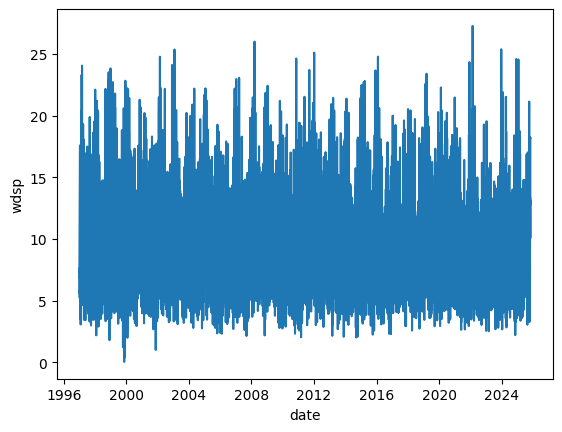

In [77]:
sns.lineplot(data=weather_rolling_wdsp, x = 'date', y = 'wdsp')

In [89]:
# it proably looks very similar to resampling per day 
# REMOVE 
# re-sample windspeed per month start
daily_wdsp_mean = weather_wdsp['wdsp'].resample('D').mean().round(2)
weather_wdsp_daily = pd.DataFrame({"mean wdsp" : daily_wdsp_mean}, index = daily_wdsp_mean.index)

#show 
weather_wdsp_daily.head(5)

,mean wdsp
date,
1997-01-01,7.61
1997-01-02,6.48
1997-01-03,5.69
1997-01-04,5.77
1997-01-05,5.81


<Axes: xlabel='date', ylabel='wdsp'>

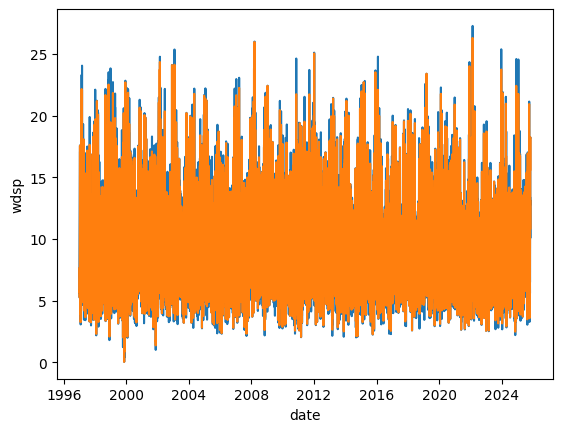

In [90]:
# compare with daily average 
#REMOVE
# plot the montly data 
sns.lineplot(data=weather_rolling_wdsp, x = 'date', y = 'wdsp')
sns.lineplot(data = weather_wdsp_daily, x = 'date', y = 'mean wdsp')

In [92]:
# plot max windspeed each daily 
daily_w_max = weather_wdsp['wdsp'].resample('D').max().round(2)
weather_wdsp_daily['max wdsp'] = daily_w_max 

# show
#weather_wdsp_daily.head(5)

<Axes: xlabel='date', ylabel='max wdsp'>

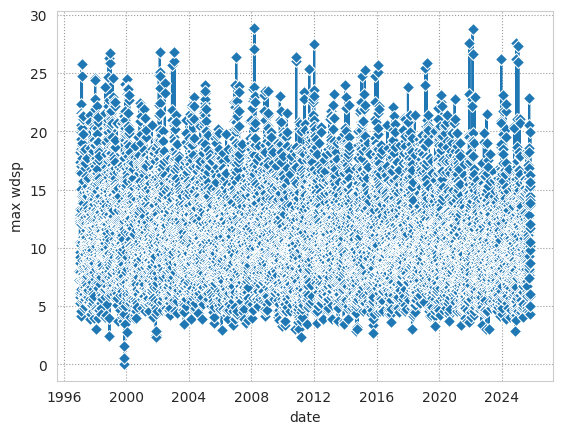

In [105]:

sns.lineplot(data = weather_wdsp_daily, x = 'date', y = 'max wdsp', marker='D')
#sns.set_style({"grid.color": ".6", "grid.linestyle": "."})

In [110]:
# resample daily max to get monthly mean of max wdsp
monthly_wdsp_max_mean  = weather_wdsp_daily['max wdsp'].resample('MS').mean().round(2)
weather_wdsp_monthly = pd.DataFrame({'wdsp max': monthly_wdsp_max_mean}, index = monthly_wdsp_max_mean.index)

weather_wdsp_monthly.head(3)

,wdsp max
date,
1997-01-01,9.29
1997-02-01,18.31
1997-03-01,13.81


<Axes: xlabel='date', ylabel='wdsp max'>

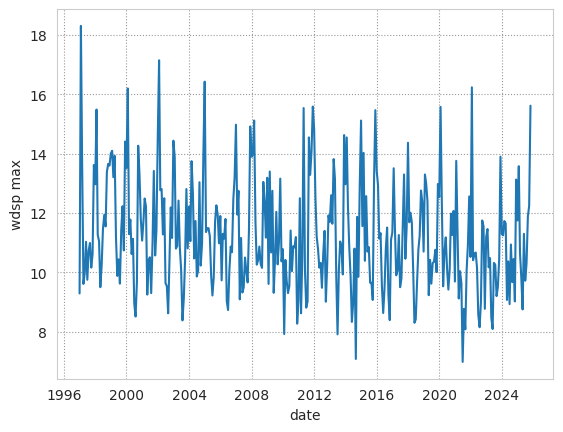

In [112]:
sns.lineplot(data = weather_wdsp_monthly, x = 'date', y = 'wdsp max')